In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
c_ins_csv=pd.read_csv('claims Original.csv')
insur=pd.DataFrame(c_ins_csv)
insur.head(10) #First 10 rows of the dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,0
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,0
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,0
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision,0
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils,0


In [3]:
insur['WeekOfMonth']=insur['WeekOfMonth'].astype('object')
insur['WeekOfMonthClaimed']=insur['WeekOfMonthClaimed'].astype('object')
insur['RepNumber']=insur['RepNumber'].astype('object')
insur['Deductible']=insur['Deductible'].astype('object')
insur['DriverRating']=insur['DriverRating'].astype('object')

##### We are removing features 'Age', 'PolicyNumber' and 'Year'.

In [347]:
one_hot = pd.get_dummies(insur[['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea','DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex','MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory','VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating','Days_Policy_Accident', 'Days_Policy_Claim','PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder','PoliceReportFiled', 'WitnessPresent', 'AgentType','NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars','BasePolicy']], drop_first=True)
one_hot=pd.DataFrame(one_hot)

### Implementing SOM for outlier detection

 [ 500 / 500 ] 100% - 0.00116 it/s - quantization error: 3.0958811728264237


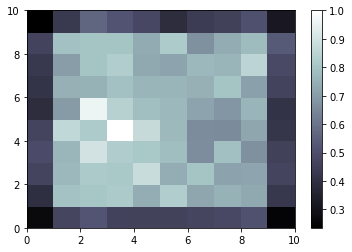

In [73]:
from sklearn import preprocessing

X=one_hot
X=np.array(X)

from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

som=MiniSom(10,10,111,learning_rate=0.5,sigma=1.0)
som.random_weights_init(X)
som.train_random(X,num_iteration=500,verbose=True)
bone()
pcolor(som.distance_map().T)
colorbar()

In [74]:
mappings = som.win_map(X)
#mappings

In [140]:
#frauds=mappings[(3,4)]
frauds=np.concatenate((mappings[(3,4)], mappings[(2,5)], mappings[(2,3)], mappings[(1,4)], mappings[(4,2)], mappings[(4,4)], mappings[(8,8)], mappings[(3,5)], mappings[(2,2)], mappings[(5,8)], mappings[(4,3)], mappings[(4,5)], mappings[(2,4)]), axis=0)
frauds

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [56]:
np.savetxt("frauds_inss.csv", frauds, delimiter=",")

In [141]:
fraud_csv=pd.read_csv('frauds_inss.csv')
fraud=pd.DataFrame(frauds)
fraud=fraud.astype(int)

In [142]:
arr=[]

In [145]:
for i in range(1867):
    arr=np.append(arr,one_hot[(one_hot==np.array(fraud.iloc[i:i+1])).all(axis=1)].index[0])

In [146]:
arr=arr.astype('int')

In [147]:
one_hot['Fraud']=0

for i in arr:
    one_hot.at[i,'Fraud']=1

pred=one_hot['Fraud']
true=insur['FraudFound_P']

In [148]:
print(confusion_matrix(true,pred))
from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(true,pred))
from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(true,pred))
print("\n")
print("F1 Score:-")
print(f1_score(true, pred))

[[12790  1707]
 [  763   160]]


Recall Score:-
0.1733477789815818


Precision Score:-
0.0856989823245849


F1 Score:-
0.11469534050179213


### Implementing DBSCAN

In [250]:
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

ccsv=pd.read_csv('Trainnmod.csv')
one_hot=pd.DataFrame(ccsv)

model=DBSCAN(eps=3, min_samples=3000, algorithm='brute').fit(one_hot)
model

DBSCAN(algorithm='brute', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3000, n_jobs=None, p=None)

In [252]:
f_pred=outliers_df[model.labels_==-1].index #The ones labelled as -1 are the outliers
f_pred

Int64Index([    0,     3,     4,     5,     6,    14,    15,    19,    22,
               23,
            ...
            15376, 15377, 15379, 15384, 15389, 15402, 15407, 15412, 15414,
            15416],
           dtype='int64', length=3882)

In [251]:
outliers_df=pd.DataFrame(one_hot)

In [253]:
one_hot['Fraud']=0

In [254]:
for i in f_pred:
    one_hot.at[i,'Fraud']=1

In [255]:
pred=one_hot['Fraud']
true=insur['FraudFound_P']

print(confusion_matrix(true,pred))
from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(true,pred))
from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(true,pred))
print("\n")
print("F1 Score:-")
print(f1_score(true, pred))

[[10740  3757]
 [  798   125]]


Recall Score:-
0.13542795232936078


Precision Score:-
0.032199896960329724


F1 Score:-
0.052029136316337155


### Implementing Isolation Forest

In [271]:
from sklearn.ensemble import IsolationForest

In [420]:
alg=IsolationForest(n_estimators=100, max_samples=256, contamination=0.2, random_state=np.random.RandomState(42), verbose=0, behaviour="new")

In [421]:
aa=np.array(alg.fit_predict(one_hot))

In [422]:
f_pred=np.where(aa==-1)

In [423]:
one_hot['Fraud']=0

In [424]:
for i in f_pred:
    one_hot.at[i,'Fraud']=1

In [425]:
pred=one_hot['Fraud']
true=insur['FraudFound_P']

In [426]:
roc_auc_score(true, pred)

0.5100259096457436

In [427]:
if_cm=confusion_matrix(true,pred)

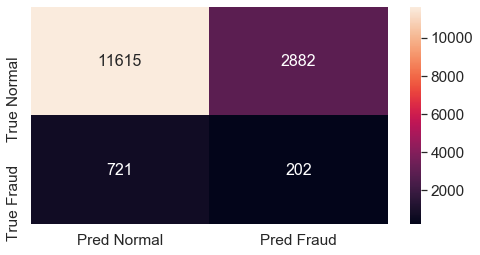

In [428]:
df_cm = pd.DataFrame(if_cm, ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [431]:
print(confusion_matrix(true,pred))
from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(true,pred))
from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(true,pred))
print("\n")
print("F1 Score:-")
print(f1_score(true, pred))

[[11615  2882]
 [  721   202]]


Recall Score:-
0.218851570964247


Precision Score:-
0.0654993514915694


F1 Score:-
0.10082355877214874


In [183]:
import eif as iso

eif=iso.iForest(one_hot.values, ntrees=100, sample_size=256, ExtensionLevel = one_hot.shape[1] - 1)
anomaly_scores = eif.compute_paths(X_in = one_hot.values)
anomaly_scores_sorted = np.argsort(anomaly_scores)
indices_with_preds = anomaly_scores_sorted[-int(np.ceil(0.4 * one_hot.shape[0])):]

In [184]:
one_hot['Fraud']=0

for i in indices_with_preds:
    one_hot.at[i,'Fraud']=1

pred=one_hot['Fraud']
true=insur['FraudFound_P']

print(confusion_matrix(true,pred))
from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(true,pred))
from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(true,pred))
print("\n")
print("F1 Score:-")
print(f1_score(true, pred))

[[8604 5893]
 [ 648  275]]


Recall Score:-
0.2979414951245937


Precision Score:-
0.04458495460440986


F1 Score:-
0.07756310816527993


In [139]:
one_hot = pd.get_dummies(insur[['Month', 'Make', 'AccidentArea', 'MonthClaimed', 'Sex', 'Fault', 'PolicyType', 'VehicleCategory','VehiclePrice', 'Deductible','Days_Policy_Accident','PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'AgentType','NumberOfSuppliments', 'AddressChange_Claim','BasePolicy']], drop_first=True)
one_hot=pd.DataFrame(one_hot)

In [458]:
ccsv=pd.read_csv('Trainnmod.csv')
one_hot=pd.DataFrame(ccsv)

### Implementing LOF (Local Outlier Factor)

In [459]:
from sklearn.neighbors import LocalOutlierFactor

In [460]:
alg=LocalOutlierFactor(n_neighbors=100, contamination=0.2, algorithm='auto')

In [461]:
a=np.array(alg.fit_predict(one_hot))

In [462]:
f_pred=np.where(a==-1)

In [463]:
one_hot['Fraud']=0

for i in f_pred:
    one_hot.at[i,'Fraud']=1

In [464]:
true=insur['FraudFound_P']
pred=one_hot['Fraud']

In [465]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

if_cm=confusion_matrix(true,pred)

In [466]:
print(confusion_matrix(true,pred))
from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(true,pred))
from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(true,pred))
print("\n")
print("F1 Score:-")
print(f1_score(true, pred))

[[11634  2863]
 [  702   221]]


Recall Score:-
0.23943661971830985


Precision Score:-
0.07166018158236057


F1 Score:-
0.11030696281507363


## Scores

In [1]:
f1som=0.11469534050179213
f1dbs=0.052029136316337155
f1iso=0.10082355877214874
f1lof=0.11030696281507363

resom=0.1733477789815818
redbs=0.13542795232936078
reiso=0.218851570964247
relof=0.23943661971830985

prsom=0.0856989823245849
prdbs=0.032199896960329724
priso=0.0654993514915694
prlof=0.07166018158236057

In [9]:
f1_scores={
    'SOM':f1som,
    'DBS':f1dbs,
    'ISO':f1iso,
    'LOF':f1lof
}

re_scores={
    'SOM':resom,
    'DBS':redbs,
    'ISO':reiso,
    'LOF':relof
}

pr_scores={
    'SOM':prsom,
    'DBS':prdbs,
    'ISO':priso,
    'LOF':prlof
}

Text(0.5, 0, 'F1 Score')

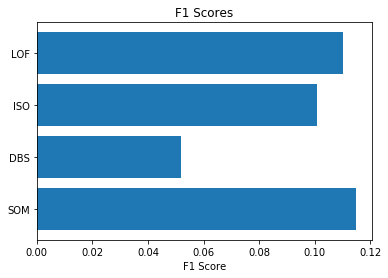

In [5]:
plt.title('F1 Scores')
plt.barh(range(len(f1_scores)), list(f1_scores.values()), align='center')
plt.yticks(range(len(f1_scores)), list(f1_scores.keys()))
plt.xlabel('F1 Score')

Text(0.5, 0, 'Recall Score')

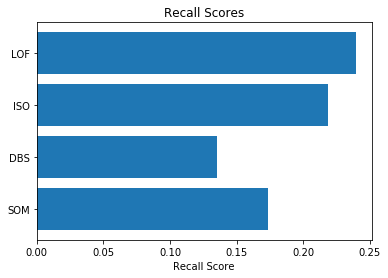

In [7]:
plt.title('Recall Scores')
plt.barh(range(len(re_scores)), list(re_scores.values()), align='center')
plt.yticks(range(len(re_scores)), list(re_scores.keys()))
plt.xlabel('Recall Score')

Text(0.5, 0, 'Precision Score')

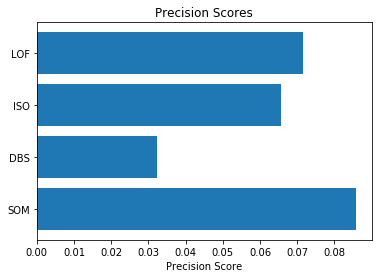

In [10]:
plt.title('Precision Scores')
plt.barh(range(len(pr_scores)), list(pr_scores.values()), align='center')
plt.yticks(range(len(pr_scores)), list(pr_scores.keys()))
plt.xlabel('Precision Score')